In [1]:
import json
import urllib3
import time
import urllib.request
import pandas as pd
from pandas.io.json import json_normalize
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['savefig.pad_inches'] = 0
plt.rcParams['savefig.format'] = 'pdf'
plt.rcParams['legend.frameon'] = True

#pd.set_option('display.max_rows', 50)
#pd.set_option('display.max_columns', 50)

import seaborn as sns
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('deep')
import warnings
warnings.filterwarnings('ignore')

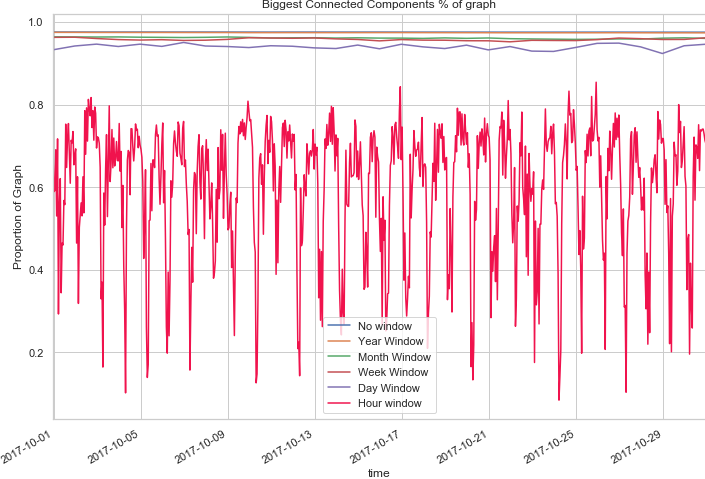

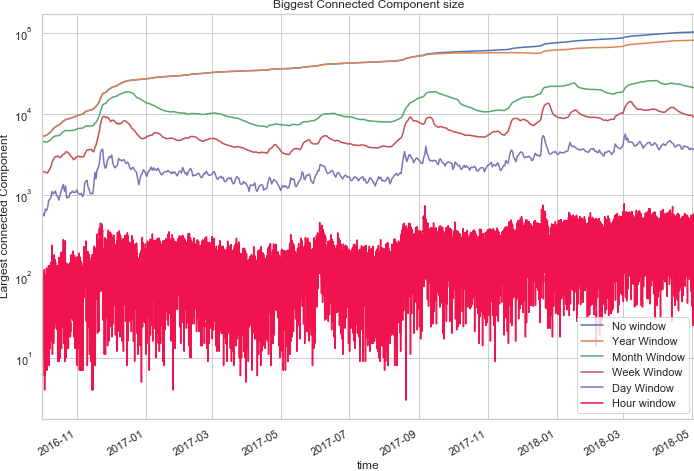

In [5]:
def fullPlot(toPlot,title,x,y,scale,start,end):
    windows = [31536000000,2592000000,604800000,86400000]
    labels = ['Year Window','Month Window','Week Window','Day Window']
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    ax.set_yscale(scale)

    with open('nowindow.json') as json_file:
        x = json.load(json_file)
        x= pd.DataFrame(x['views'])
        x['time'] = pd.to_datetime(x['time'],unit='ms')
        x['index'] = pd.to_datetime(x['time'],unit='ms')
        x.set_index('index', inplace=True)
        x =x[start:end]
        x = x[x['total'] != 0]
        x['mean'] = x[toPlot].rolling(window=4,center=False).mean()
        x.plot(x='time', y=toPlot,ax=ax, label="No window")

    with open('bigCC.json') as json_file:
        cc1 = json.load(json_file)
        cc1= pd.DataFrame(cc1['views'])
        cc1['time'] = pd.to_datetime(cc1['time'],unit='ms')
        cc1['index'] = pd.to_datetime(cc1['time'],unit='ms')
        cc1.set_index('index', inplace=True)
        cc1=cc1[start:end]
        cc1 = cc1[cc1[toPlot] != 0]
        index = 0
        for i in windows:
            y = cc1[cc1['windowsize'] == i]
            y['mean'] = y[toPlot].rolling(window=4,center=False).mean()
            hours = str(int((i/3600000)))+" hour window"
            y.plot(x='time', y=toPlot,ax=ax, label=labels[index])
            index +=1

    with open('cc1hour.json') as json_file:
        x = json.load(json_file)
        x= pd.DataFrame(x['views'])
        x['index'] = pd.to_datetime(x['time'],unit='ms')
        x['time'] = pd.to_datetime(x['time'],unit='ms')
        x.set_index('index', inplace=True)
        x =x[start:end]
        x = x[x['total'] != 0]
        x['hour'] = x.apply(lambda row: int(row['time'].hour),axis=1)
        #x = x[x['hour'].isin([4,16])]
        x.plot(x='time', y=toPlot,ax=ax, color="#f0134d", label="Hour window")
    plt.show()

#x['mean'] = x[toPlot].rolling(window=24,center=False).mean()
#[0,4,8,12,16,20,24]
#'2016-07-01': '2018-05-03'
fullPlot('proportion','Biggest Connected Components % of graph','Date','Proportion of Graph','linear','2017-09-30 23:00:00','2017-10-30')

fullPlot('biggest','Biggest Connected Component size','Date','Largest connected Component','log','2016-09-30 23:00:00','2018-10-30')

#fullPlot('totalWithoutIslands','Total Connected Components','Date','Total Connected Components','linear')

#fullPlot('clustersGT2','Total Connected Components with a size > 2','Date','Total Connected Components with size > 2','linear')


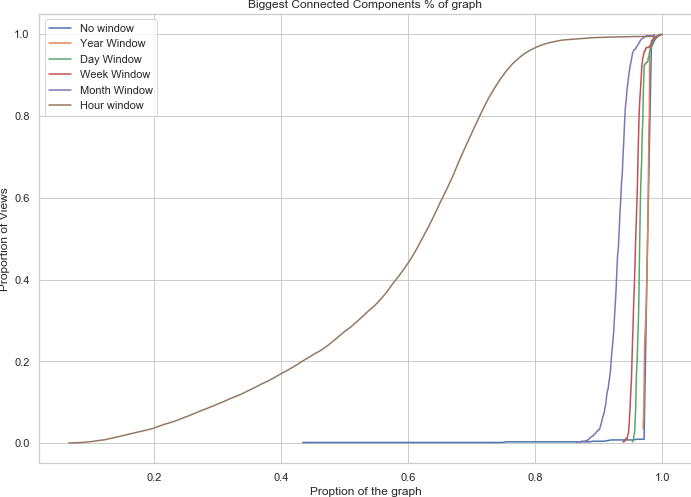

In [49]:
def fullPlot(toPlot,title,x,y,scale,start,end):
    num_bins = 100
    windows = [31536000000,2592000000,604800000,86400000]
    labels = ["Year Window",'Day Window','Week Window','Month Window']
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    ax.set_yscale(scale)

    with open('nowindow.json') as json_file:
        x = json.load(json_file)
        x= pd.DataFrame(x['views'])
        x['time'] = pd.to_datetime(x['time'],unit='ms')
        x['index'] = pd.to_datetime(x['time'],unit='ms')
        x.set_index('index', inplace=True)
        x =x[start:end]
        x = x[x['total'] != 0]
        x['mean'] = x[toPlot].rolling(window=4,center=False).mean()
        counts, bin_edges = np.histogram (x[toPlot], bins=num_bins, normed=True)
        cdf = np.cumsum (counts)
        l,=plt.plot (bin_edges[1:], cdf/cdf[-1])
        l.set_label("No window")

    with open('bigCC.json') as json_file:
        cc1 = json.load(json_file)
        cc1= pd.DataFrame(cc1['views'])
        cc1['time'] = pd.to_datetime(cc1['time'],unit='ms')
        cc1['index'] = pd.to_datetime(cc1['time'],unit='ms')
        cc1.set_index('index', inplace=True)
        cc1=cc1[start:end]
        cc1 = cc1[cc1[toPlot] != 0]
        index = 0
        for i in windows:
            y = cc1[cc1['windowsize'] == i]
            y['mean'] = y[toPlot].rolling(window=4,center=False).mean()
            hours = str(int((i/3600000)))+" hour window"
            counts, bin_edges = np.histogram (y[toPlot], bins=num_bins, normed=True)
            cdf = np.cumsum (counts)
            l,=plt.plot (bin_edges[1:], cdf/cdf[-1])
            l.set_label(labels[index])
            index +=1

    with open('cc1hour.json') as json_file:
        x = json.load(json_file)
        x= pd.DataFrame(x['views'])
        x['index'] = pd.to_datetime(x['time'],unit='ms')
        x['time'] = pd.to_datetime(x['time'],unit='ms')
        x.set_index('index', inplace=True)
        x =x[start:end]
        x = x[x['total'] != 0]
        x['hour'] = x.apply(lambda row: int(row['time'].hour),axis=1)
        counts, bin_edges = np.histogram (x[toPlot], bins=num_bins, normed=True)
        cdf = np.cumsum (counts)
        plt.plot(bin_edges[1:], cdf/cdf[-1],label="Hour window")
        #x.plot(x='time', y=toPlot,ax=ax, color="#f0134d",)
    ax.legend()
    plt.show()



fullPlot('proportion','Biggest Connected Components % of graph','Proption of the graph','Proportion of Views','linear','2016-07-01', '2018-05-03')


        



# OLD STUFF

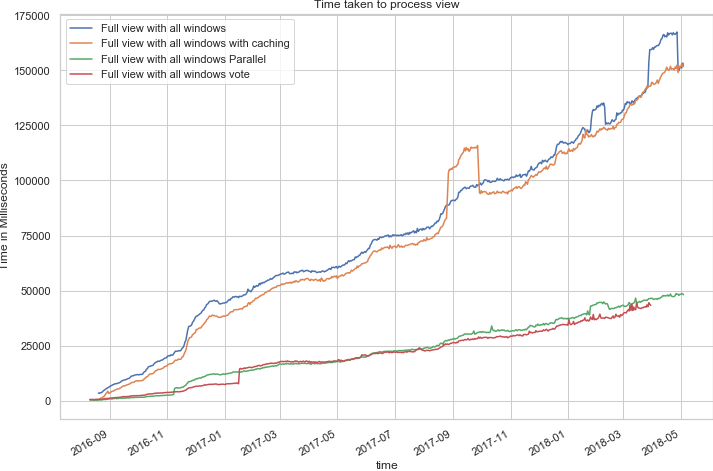

In [38]:



windows = [31536000000,2592000000,604800000,86400000]
with open('bigCC.json') as json_file:
    x = json.load(json_file)
    x= pd.DataFrame(x['views'])
    x['time'] = pd.to_datetime(x['time'],unit='ms')
    x = x[x['total'] != 0]
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    plt.title('Biggest Connected Components % of graph')
    plt.xlabel('Date')
    plt.ylabel('Proportion of Graph')
    for i in windows:
        y = x[x['windowsize'] == i]
        y['mean'] = y['proportion'].rolling(window=4,center=False).mean()
        hours = str(int((i/3600000)))+" hour window"
        y.plot(x='time', y='mean',ax=ax, label=hours)
    plt.show()





windows = [31536000000,2592000000,604800000,86400000]
y=0
x=0
z=0
a=0
with open('bigCC.json') as json_file:
    x = json.load(json_file)
    x= pd.DataFrame(x['views'])
    x['time'] = pd.to_datetime(x['time'],unit='ms')
    x = x[x['total'] != 0]
    
with open('bigCC2.json') as json_file:
    y = json.load(json_file)
    y= pd.DataFrame(y['views'])
    y['time'] = pd.to_datetime(y['time'],unit='ms')
    y = y[y['total'] != 0]
    
with open('bigCC3.json') as json_file:
    z = json.load(json_file)
    z = pd.DataFrame(z['views'])
    z['time'] = pd.to_datetime(z['time'],unit='ms')
    z = z[z['total'] != 0]
    
with open('bigCC4.json') as json_file:
    a = json.load(json_file)
    a = pd.DataFrame(a['views'])
    a['time'] = pd.to_datetime(z['time'],unit='ms')
    a = a[a['total'] != 0]
    

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
plt.title('Time taken to process view')
plt.xlabel('Date')
plt.ylabel('Time in Milliseconds')
x.plot(x='time', y='viewTime',ax=ax, label="Full view with all windows")
y.plot(x='time', y='viewTime',ax=ax, label="Full view with all windows with caching")
z.plot(x='time', y='viewTime',ax=ax, label="Full view with all windows Parallel")
a.plot(x='time', y='viewTime',ax=ax, label="Full view with all windows vote")


plt.show()